# Análise Exploratória – House Prices

Este notebook faz EDA no dataset “House Prices – Advanced Regression Techniques” (Kaggle), seguindo o fluxo:
1. Importar bibliotecas  
2. Carregar dados  
3. Visão geral (head, info, describe)  
4. Identificação de missing  
5. Gráficos iniciais  

In [1]:
!git clone https://github.com/AndreVVoigt/house-price-eda-regression

%cd house-price-eda-regression

Cloning into 'house-price-eda-regression'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 46 (delta 14), reused 28 (delta 7), pack-reused 0 (from 0)
Receiving objects: 100% (46/46), 214.91 KiB | 5.12 MiB/s, done.
Resolving deltas: 100% (14/14), done.
/content/house-price-eda-regression


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose      import ColumnTransformer
from sklearn.pipeline     import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble     import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics      import mean_absolute_error
from sklearn import metrics


In [6]:
# 1. Carregar o dataset de treino
train = pd.read_csv('data/train.csv')

In [15]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
missing = train.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]

In [11]:
print(missing.head(20))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


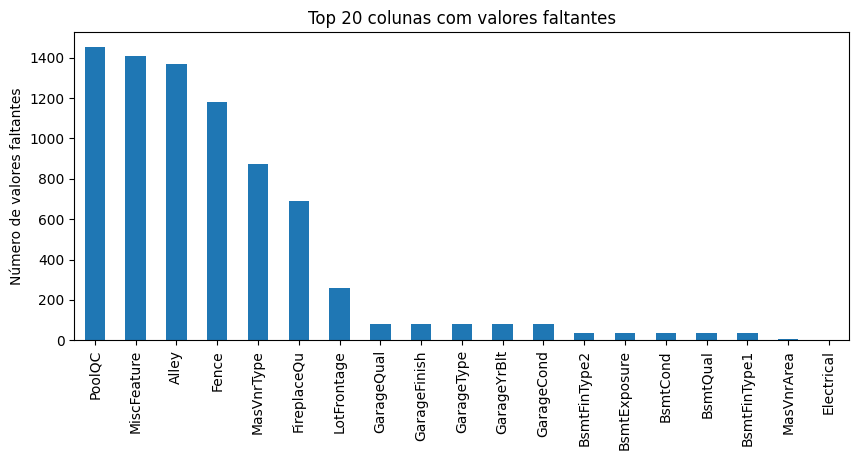

In [13]:
plt.figure(figsize=(10, 4))
missing.head(20).plot.bar()
plt.ylabel('Número de valores faltantes')
plt.title('Top 20 colunas com valores faltantes')
plt.show()

In [17]:
X = train.drop(columns=['Id', 'SalePrice'])
y = train['SalePrice']

In [18]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

In [23]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'), cat_cols)
])

In [24]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbv...
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('model', RandomForestRegressor(n_jobs=-1, random_state=42))])

In [27]:
pred = pipeline.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [14, 29] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [30]:
print('MAE pipeline: ', mean_absolute_error(y_test, pred))

MAE pipeline:  17690.878116438358


# Análise de Resíduos

In [32]:
residuals = y_test - pred

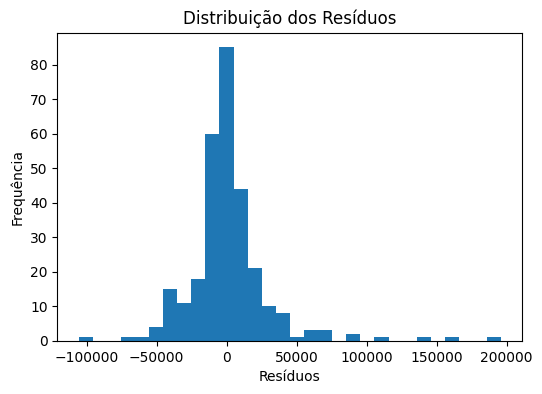

In [33]:
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=30)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

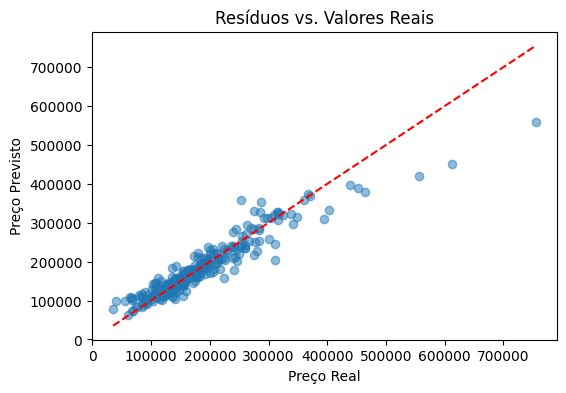

In [39]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Resíduos vs. Valores Reais')
plt.xlabel('Preço Real')
plt.ylabel('Preço Previsto')
plt.show()

# Ajuste de Hiperparâmetros

In [43]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'model__n_estimators': randint(50, 300),
    'model__max_depth': randint(5, 50),
    'model__max_features': ['sqrt', 0.3, 0.5]
}

In [44]:
rs = RandomizedSearchCV(
    pipeline,
    param_dist,
    n_iter=20,
    cv=3,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1
)

In [45]:
rs.fit(X_train, y_train)
best_rf = rs.best_estimator_
print('Melhor MAE (CV): {-rs.best_score_:.2f}')

Melhor MAE (CV): {-rs.best_score_:.2f}


In [47]:
print('Melhor configuração de hiperparâmetros:')
print(rs.best_params_)

Melhor configuração de hiperparâmetros:
{'model__max_depth': 43, 'model__max_features': 0.3, 'model__n_estimators': 260}


# Validação Cruzada

In [49]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    best_rf,
    X,
    y,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1
)
print('Scores de MAE:', scores)
print('Média de MAE:', -scores.mean())

Scores de MAE: [-15908.69461275 -17673.46658325 -17114.41737355 -15617.09853793
 -17605.10991834]
Média de MAE: 16783.75740516333


# Testando com XGBoost

In [54]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    n_jobs=-1
)

In [52]:
preprocessor_xgb = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'), cat_cols)
])

In [53]:
pipeline_xgb = Pipeline([
    ('prep', preprocessor_xgb),
    ('model', xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=-1))
])

In [56]:
scores = cross_val_score(
    pipeline_xgb,  # Use pipeline_xgb instead of xgb_model
    X,
    y,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1
)
print('Scores de MAE:', scores)

Scores de MAE: [-16034.06152344 -17894.8203125  -16642.02148438 -14428.11132812
 -17472.82617188]


# Tabela de Métricas

In [57]:
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

In [58]:
metrics = pd.DataFrame({
    'MAE': [mean_absolute_error(y_test, pred)],
    'MSE': [mse],
    'RMSE': [rmse],
    'R2': [r2]
}, index=['Baseline'])

display(metrics.style.format({
    'MAE': '{:.2f}',
    'MSE': '{:.2f}',
    'RMSE': '{:.2f}',
    'R2': '{:.3f}'
}))


,MAE,MSE,RMSE,R2
Baseline,17690.88,853569604.77,29215.91,0.889


# Gráfico Real vs Previsto

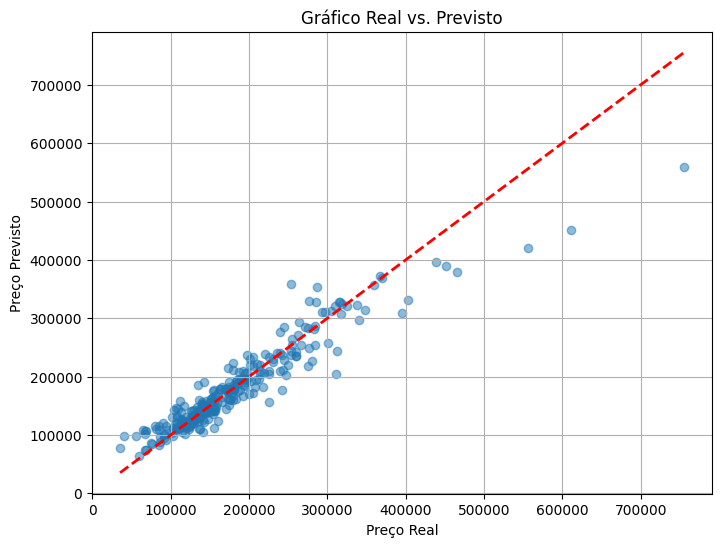

In [62]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, pred, alpha=0.5)
lims = [min(y_test.min(), pred.min()), max(y_test.max(), pred.max())]
plt.plot(lims, lims, linestyle='--', linewidth=2, color='r')
plt.xlabel('Preço Real')
plt.ylabel('Preço Previsto')
plt.title('Gráfico Real vs. Previsto')
plt.grid(True)
plt.show()